Pertama-tama perlu mengunduh dataset menggunakan fungsi wget untuk mendaptkan dataset dan mengimpan pada path yang telah tersedia

## Tahap 1

### Pengambilan dataset

In [ ]:
!wget https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-01-21/spotify_songs.csv?raw=true -O tidy_spotify_songs.csv

--2025-01-03 10:02:40--  https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-01-21/spotify_songs.csv?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/rfordatascience/tidytuesday/raw/refs/heads/main/data/2020/2020-01-21/spotify_songs.csv [following]
--2025-01-03 10:02:41--  https://github.com/rfordatascience/tidytuesday/raw/refs/heads/main/data/2020/2020-01-21/spotify_songs.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2020/2020-01-21/spotify_songs.csv [following]
--2025-01-03 10:02:41--  https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2020/2020-01-21/spotify_songs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)

### Menambahkan library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Load dataset `tidy_spotify_songs.csv`

In [ ]:
data = pd.read_csv('tidy_spotify_songs.csv')
data.reset_index(inplace=True)

pada code bawah ini mendeskipsikan mengenai atribut-atribut dan tipe datanya  pada dataset

In [ ]:
print("Info dataset awal:")
data.info()

Info dataset awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     32833 non-null  int64  
 1   track_id                  32833 non-null  object 
 2   track_name                32828 non-null  object 
 3   track_artist              32828 non-null  object 
 4   track_popularity          32833 non-null  int64  
 5   track_album_id            32833 non-null  object 
 6   track_album_name          32828 non-null  object 
 7   track_album_release_date  32833 non-null  object 
 8   playlist_name             32833 non-null  object 
 9   playlist_id               32833 non-null  object 
 10  playlist_genre            32833 non-null  object 
 11  playlist_subgenre         32833 non-null  object 
 12  danceability              32833 non-null  float64
 13  energy                    32833 non-null  

dibawah ini memiliki keguanaan untuk mengonversi kolom track_album_release_date dalam dataset data menjadi format datetime menggunakan fungsi pd.to_datetime.

In [ ]:
data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   index                     32833 non-null  int64         
 1   track_id                  32833 non-null  object        
 2   track_name                32828 non-null  object        
 3   track_artist              32828 non-null  object        
 4   track_popularity          32833 non-null  int64         
 5   track_album_id            32833 non-null  object        
 6   track_album_name          32828 non-null  object        
 7   track_album_release_date  30947 non-null  datetime64[ns]
 8   playlist_name             32833 non-null  object        
 9   playlist_id               32833 non-null  object        
 10  playlist_genre            32833 non-null  object        
 11  playlist_subgenre         32833 non-null  object        
 12  danceability      

code di bawah ini akan menghasilkan output  Top 10 musik pada priode 21-28 Januari tahun 2020

In [ ]:
print("Top 10 Musik pada Periode 21-28 Januari 2020")
first_table = pd.concat([data.head(10)])
print(first_table.to_string(index=False))

Top 10 Musik pada Periode 21-28 Januari 2020
 index               track_id                                            track_name     track_artist  track_popularity         track_album_id                                      track_album_name track_album_release_date playlist_name            playlist_id playlist_genre playlist_subgenre  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence   tempo  duration_ms
     0 6f807x0ima9a1j3VPbc7VN I Don't Care (with Justin Bieber) - Loud Luxury Remix       Ed Sheeran                66 2oCs0DGTsRO98Gh5ZSl2Cx I Don't Care (with Justin Bieber) [Loud Luxury Remix]               2019-06-14     Pop Remix 37i9dQZF1DXcZDD7cfEKhW            pop         dance pop         0.748   0.916    6    -2.634     1       0.0583        0.1020          0.000000    0.0653    0.518 122.036       194754
     1 0r7CVbZTWZgbTCYdfa2P31                       Memories - Dillon Francis Remix         Maroon 5                6

code di bawah ini akan menghasilkan output Bad 10 musik pada priode 21-28 Januari tahun 2020

In [ ]:
print("Bad 10 Musik pada Periode 21-28 Januari 2020")
last_table = pd.concat([data.tail(10)])
print(last_table.to_string(index=False))

Bad 10 Musik pada Periode 21-28 Januari 2020
 index               track_id                             track_name                        track_artist  track_popularity         track_album_id                       track_album_name track_album_release_date   playlist_name            playlist_id playlist_genre         playlist_subgenre  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence   tempo  duration_ms
 32823 0coMLoVcagZPGF5zxc5RF8 Everybody Is In The Place - Radio Edit                            Hardwell                28 1PdMbB6qgSzS9zcT9xP6Kx Everybody Is In The Place (Radio Edit)               2014-04-18 ♥ EDM LOVE 2020 6jI1gFr6ANFtT8MmTvA2Ux            edm progressive electro house         0.609   0.989    2    -3.510     1       0.0867      0.000434          0.219000    0.0715   0.0358 130.046       171697
 32824 3zKST4nk4QJE77oLjUZ0Ng                            Hey Brother                              Avicii               

Code dibawah ini akan menghasilkan jumlah atribut yang berada didalam dataset

In [ ]:
n_atribut = data.shape[1]
print(f"\nJumlah Atribut: {n_atribut}")

atribut_list = data.columns.tolist()
print(f"List Atribut: {atribut_list}")


Jumlah Atribut: 24
List Atribut: ['index', 'track_id', 'track_name', 'track_artist', 'track_popularity', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


code dibawah ini menemukan dan menyimpan baris-baris dalam dataset data yang memiliki nilai kosong atau missing values (NaN atau NaT) di salah satu kolom.

In [ ]:
anomali = data[data.isna().any(axis=1)]
if len(anomali) != 0:
    print("\nList anomali:")
    print(anomali)


List anomali:
       index                track_id  \
151      151  2QtJA4gbwe1AcanB2p21aP   
749      749  77j9HOrxUpWcjwra9jgvio   
750      750  6rQ9qJPvInEqSzlh89LsPJ   
751      751  5FgtdSf7I5lClThz2ptWvl   
753      753  2ahnofp2LbBWDXcJbMaSTu   
...      ...                     ...   
32360  32360  0363w3IUcO4cJMsAFLpfLY   
32767  32767  1h7LBCgfnSUEe7qXRbwMIp   
32774  32774  1NtVWYw9QDr30Ei0phACni   
32775  32775  454ZIylnCq09ONjQE4EJ6a   
32827  32827  0aBDrRTgDCwWbcOnEIp7DJ   

                                              track_name  \
151    Stay The Night - Featuring Hayley Williams Of ...   
749                        We like to Party! (Six Flags)   
750                          Coco Jamboo - Radio Version   
751                                     Blue (Da Ba Dee)   
753                                         What Is Love   
...                                                  ...   
32360                                 Faith - Radio Edit   
32767                   

dibawah ini code untuk mengecek nilai kosong atau tidak sesuai pada table data

In [ ]:

data_kotor = data.columns[data.isna().any()].tolist()
if data_kotor:
    print("\nAtribut dengan data kotor:")
    for kolom in data_kotor:
        print(f" {[kolom]}", end='')


Atribut dengan data kotor:
 ['track_name'] ['track_artist'] ['track_album_name'] ['track_album_release_date']

code dibawah ini akan menghasilkan jumlah nilai hilang di setiap kolom

In [ ]:
print("\nJumlah nilai hilang di setiap kolom:")
print(data.isnull().sum())


Jumlah nilai hilang di setiap kolom:
index                          0
track_id                       0
track_name                     5
track_artist                   5
track_popularity               0
track_album_id                 0
track_album_name               5
track_album_release_date    1886
playlist_name                  0
playlist_id                    0
playlist_genre                 0
playlist_subgenre              0
danceability                   0
energy                         0
key                            0
loudness                       0
mode                           0
speechiness                    0
acousticness                   0
instrumentalness               0
liveness                       0
valence                        0
tempo                          0
duration_ms                    0
dtype: int64


## Tahap 2

### Cleaning

code dibawah membersihkan dataset dengan menghapus semua baris yang memiliki nilai kosong menggunakan dropna(). Dataset yang telah bersih kemudian disimpan dalam file CSV bernama cleaned_spotify_data.csv menggunakan fungsi to_csv(), tanpa menyertakan indeks. Hasilnya adalah file data yang bersih dan siap digunakan untuk analisis lebih lanjut.

In [ ]:
fd = data.dropna()
cleaned = "cleaned_spotify_data.csv"
fd.to_csv(cleaned, index=False)

 mengonversi kolom non-numerik untuk korelasi

In [ ]:
numeric_cols = fd.select_dtypes(include=[np.number])

code dibawah ini akan memberikan hasil jumlah data sebelum dan setelah di clean

In [ ]:
print(f"Data sebelum clean: {data.shape[0]} dan sesudah: {fd.shape[0]}")

Data sebelum clean: 32833 dan sesudah: 30942


code dibawah membuat visualisasi distribusi popularitas lagu dari dataset `fd` menggunakan histogram. Histogram ini dibangun dengan membagi data ke dalam 20 interval (bins), dilengkapi dengan kurva estimasi kepadatan kernel (KDE) untuk memperjelas pola distribusi. Grafik diberi judul "Distribusi Popularitas Lagu" dan memiliki label pada sumbu x (Popularitas Lagu) serta sumbu y (Frekuensi). Warna histogram ditetapkan biru, dan ukuran grafik diatur sebesar 10x6 inci untuk tampilan yang jelas.

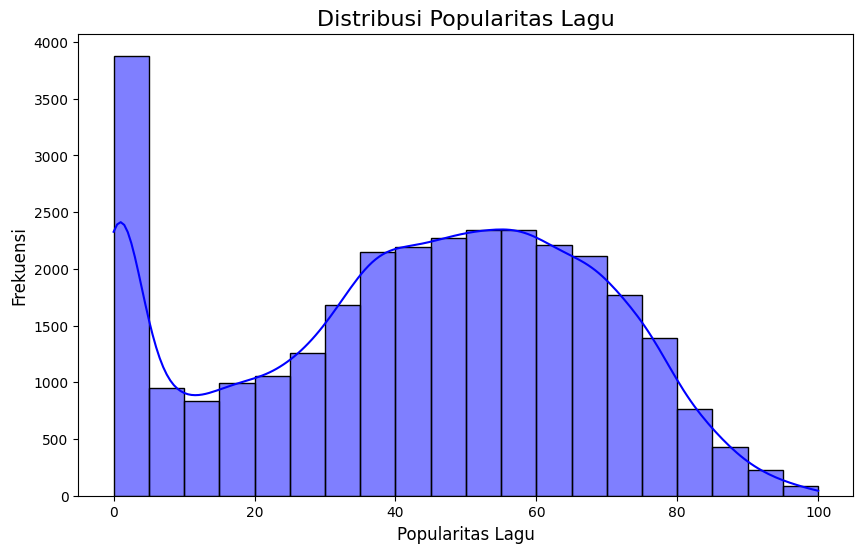

In [ ]:
"""distribusi popularitas lagu"""
plt.figure(figsize=(10, 6))
sns.histplot(fd['track_popularity'], bins=20, kde=True, color='blue')
plt.title('Distribusi Popularitas Lagu', fontsize=16)
plt.xlabel('Popularitas Lagu', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

code dibawah membuat visualisasi horizontal untuk menunjukkan distribusi popularitas lagu berdasarkan genre dalam persentase. Rata-rata popularitas dihitung untuk setiap genre, kemudian dikonversi ke persentase relatif terhadap total popularitas. Grafik berupa *bar chart* horizontal berwarna-warni dengan legenda yang menunjukkan genre dan persentasenya. Visualisasi ini mempermudah analisis kontribusi setiap genre terhadap popularitas keseluruhan.

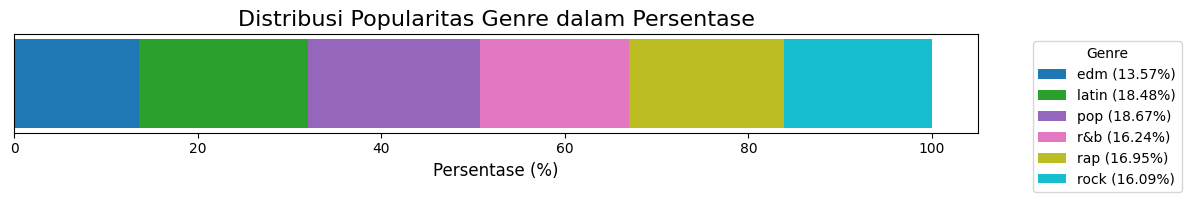

In [ ]:
"""visualisasi popularitas berdasarkan genre"""
plt.figure(figsize=(12, 2))
genre_popularity = fd.groupby('playlist_genre')['track_popularity'].mean()
total_popularity = genre_popularity.sum()
genre_percentages = (genre_popularity / total_popularity) * 100

colors = plt.cm.tab10(np.linspace(0, 1, len(genre_percentages)))
plt.barh([0], [100], color='lightgrey')
left = 0
for i, (genre, percentage) in enumerate(genre_percentages.items()):
    plt.barh([0], [percentage], left=left, color=colors[i], label=f"{genre} ({percentage:.2f}%)")
    left += percentage

plt.title('Distribusi Popularitas Genre dalam Persentase', fontsize=16)
plt.xlabel('Persentase (%)', fontsize=12)
plt.yticks([])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title='Genre')
plt.tight_layout()
plt.show()

code dibawah memvisualisasikan artis dengan lagu-lagu terpopuler, yaitu lagu dengan popularitas di atas 90. Pertama, data difilter untuk hanya menyertakan lagu dengan popularitas lebih dari 90, lalu dihitung jumlah lagu yang dimiliki oleh masing-masing artis. Kemudian, 10 artis teratas dengan jumlah lagu terbanyak dipilih dan divisualisasikan dalam bentuk grafik batang berwarna hijau. Grafik ini menampilkan artis pada sumbu x dan jumlah lagu terpopuler pada sumbu y.

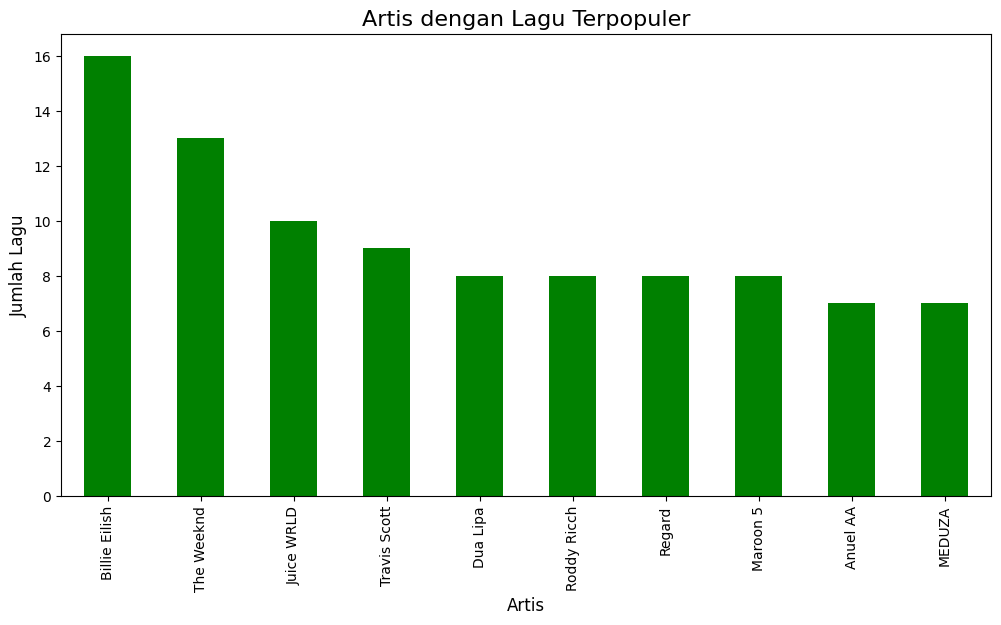

In [ ]:
"""artis dengan lagu top"""
top_artists = fd[fd['track_popularity'] > 90].groupby('track_artist')['track_popularity'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
top_artists.head(10).plot(kind='bar', color='green')
plt.title('Artis dengan Lagu Terpopuler', fontsize=16)
plt.xlabel('Artis', fontsize=12)
plt.ylabel('Jumlah Lagu', fontsize=12)
plt.show()

Kode dibawah ini mengekstrak tahun dari kolom track_album_release_date dan menambahkan kolom baru release_year dalam dataset fd. Setelah itu, jumlah lagu yang dirilis setiap tahun dihitung dengan menggunakan groupby dan size(). Kemudian, grafik garis dibuat untuk memvisualisasikan tren jumlah lagu yang dirilis per tahun. Titik-titik data digambarkan dengan simbol lingkaran dan grafik diberi warna biru, yang memungkinkan analisis perkembangan jumlah lagu berdasarkan tahun rilis.

<ipython-input-18-70f3575101b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd['release_year'] = pd.to_datetime(fd['track_album_release_date']).dt.year


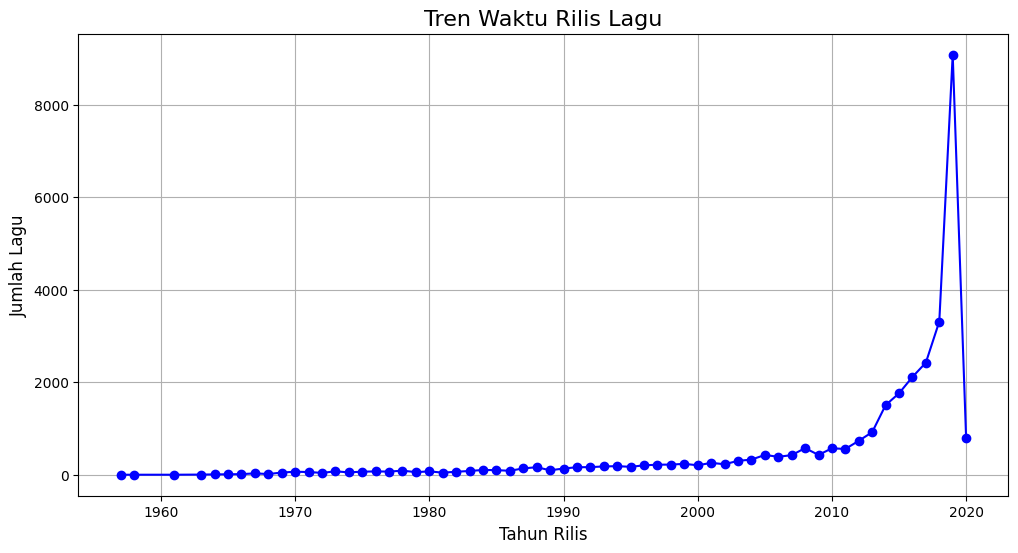

In [ ]:

fd['release_year'] = pd.to_datetime(fd['track_album_release_date']).dt.year

release_trend = fd.groupby('release_year').size()

plt.figure(figsize=(12, 6))
release_trend.plot(kind='line', marker='o', color='blue')
plt.title('Tren Waktu Rilis Lagu', fontsize=16)
plt.xlabel('Tahun Rilis', fontsize=12)
plt.ylabel('Jumlah Lagu', fontsize=12)
plt.grid(True)
plt.show()

Kode dibawah menghitung rata-rata durasi lagu populer dengan terlebih dahulu memfilter lagu-lagu yang memiliki popularitas lebih dari 80. Setelah itu, durasi lagu yang terdapat pada kolom `duration_ms` dihitung rata-ratanya dalam satuan menit dengan membagi nilai durasi yang semula dalam milidetik dengan 60.000. Hasil perhitungan ini kemudian dicetak untuk menampilkan durasi rata-rata lagu populer dalam format dua angka desimal.

In [ ]:
"""rata-rata durasi lagu yang top"""
popular_songs = fd[fd['track_popularity'] > 80]
duration_mean = popular_songs['duration_ms'].mean() / 60000  # ke menit
print(f"Durasi rata-rata lagu populer: {duration_mean:.2f} menit")

Durasi rata-rata lagu populer: 3.46 menit


Kode dibawah ini membuat heatmap yang menunjukkan korelasi antar fitur numerik dalam dataset. Pertama, matriks korelasi dihitung menggunakan fungsi `.corr()` pada kolom numerik (`numeric_cols`). Kemudian, heatmap ditampilkan dengan menggunakan *Seaborn* dan memberikan anotasi nilai korelasi pada setiap sel dengan format dua angka desimal. Heatmap ini membantu untuk mengidentifikasi hubungan antara fitur-fitur numerik, seperti korelasi antara audio dan popularitas lagu, dengan warna yang menunjukkan tingkat kekuatan korelasi.

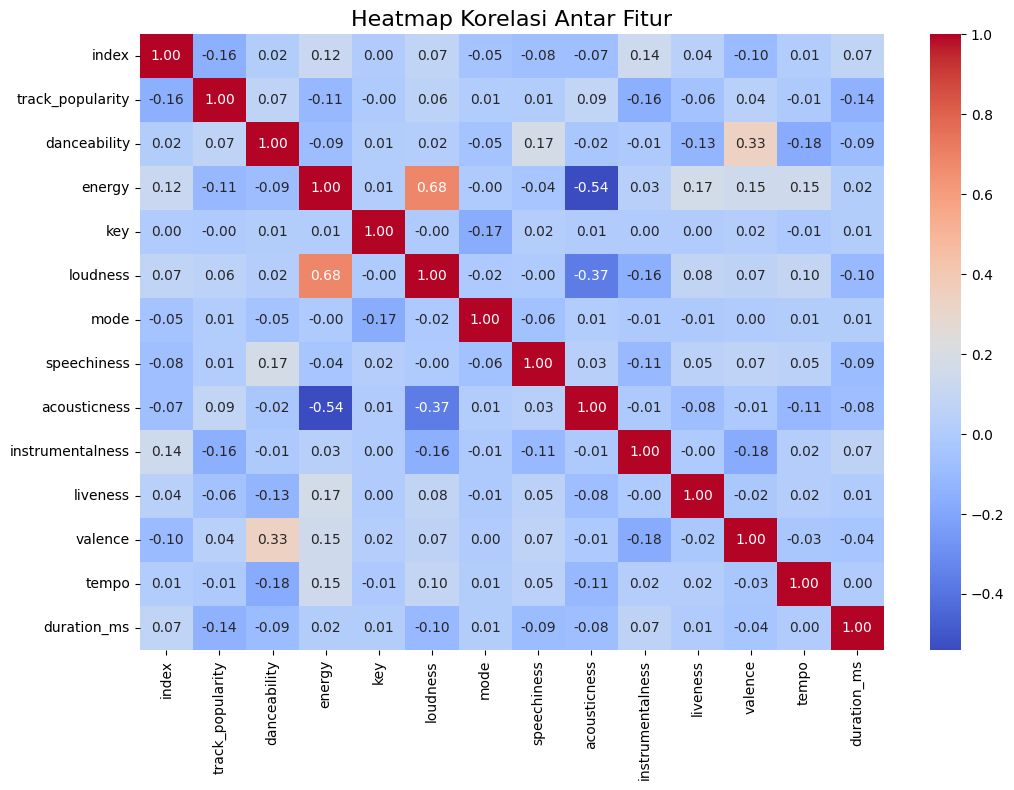

In [ ]:
"""korelasi audio dengan popularitas"""
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur', fontsize=16)
plt.show()

Kode dibawah membagi kolom `valence` dalam dataset menjadi dua kategori berdasarkan nilai ambang batas: "Negatif" untuk nilai valence antara 0 hingga 0.5, dan "Positif" untuk nilai antara 0.5 hingga 1. Pembagian ini dilakukan dengan menggunakan fungsi `pd.cut()`. Setelah itu, jumlah lagu dalam masing-masing kategori dihitung dengan `value_counts()`. Grafik batang kemudian dibuat untuk memvisualisasikan distribusi lagu berdasarkan kategori mood, dengan warna merah untuk kategori "Negatif" dan hijau untuk kategori "Positif". Grafik ini memperlihatkan jumlah lagu di setiap kategori mood pada sumbu y dan kategori mood pada sumbu x.

<ipython-input-21-2b17ef5b8aaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd['valence_category'] = pd.cut(fd['valence'], bins=[0, 0.5, 1], labels=['Negatif', 'Positif'])


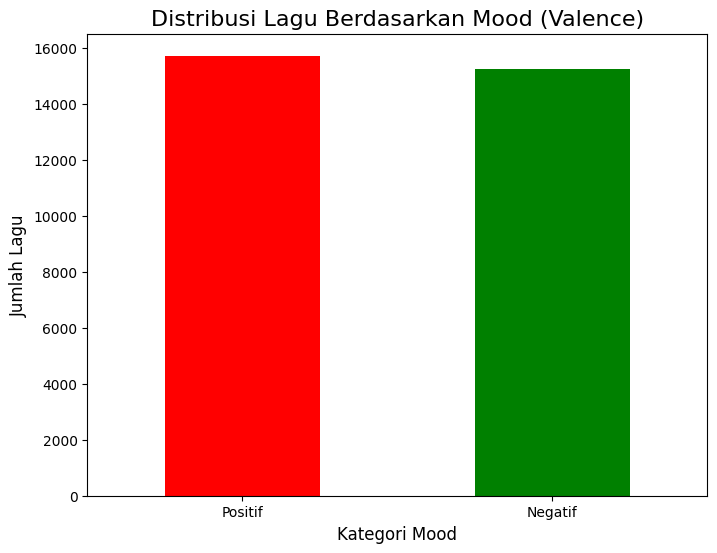

In [ ]:

fd['valence_category'] = pd.cut(fd['valence'], bins=[0, 0.5, 1], labels=['Negatif', 'Positif'])

valence_counts = fd['valence_category'].value_counts()

plt.figure(figsize=(8, 6))
valence_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Distribusi Lagu Berdasarkan Mood (Valence)', fontsize=16)
plt.xlabel('Kategori Mood', fontsize=12)
plt.ylabel('Jumlah Lagu', fontsize=12)
plt.xticks(rotation=0)
plt.show()

dibawah ini untuk menghitung pengaruh kombinasi antara *danceability* dan *energy* terhadap popularitas lagu. Pertama, kolom baru `dance_energy_level` dibuat dengan menggabungkan nilai `danceability` dan `energy`, kemudian membaginya ke dalam tiga kategori: "Low", "Medium", dan "High", berdasarkan rentang nilai yang ditentukan (0–1, 1–1.5, dan 1.5–2). Selanjutnya, rata-rata popularitas lagu dihitung untuk setiap kategori menggunakan `groupby()` dan `mean()`. Hasilnya divisualisasikan dalam grafik batang yang menunjukkan rata-rata popularitas untuk setiap level kombinasi danceability dan energy, dengan warna biru, oranye, dan hijau untuk masing-masing level. Grafik ini membantu untuk memahami bagaimana tingkat *danceability* dan *energy* berpengaruh terhadap popularitas lagu.

<ipython-input-22-d35f3e79ec9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd['dance_energy_level'] = pd.cut(
<ipython-input-22-d35f3e79ec9f>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dance_energy_popularity = fd.groupby('dance_energy_level')['track_popularity'].mean()


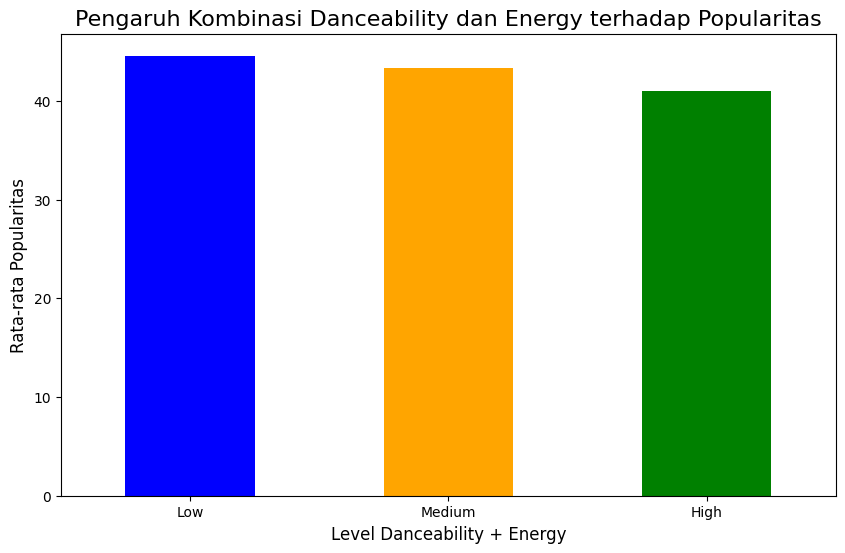

In [ ]:

fd['dance_energy_level'] = pd.cut(
    fd['danceability'] + fd['energy'],
    bins=[0, 1, 1.5, 2],
    labels=['Low', 'Medium', 'High']
)

dance_energy_popularity = fd.groupby('dance_energy_level')['track_popularity'].mean()

plt.figure(figsize=(10, 6))
dance_energy_popularity.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Pengaruh Kombinasi Danceability dan Energy terhadap Popularitas', fontsize=16)
plt.xlabel('Level Danceability + Energy', fontsize=12)
plt.ylabel('Rata-rata Popularitas', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Kode dibawah membuat diagram sebar (scatter plot) untuk memvisualisasikan hubungan antara nilai `valence` dan `track_popularity` dalam dataset `fd`. Setiap titik dalam plot mewakili satu lagu, dengan posisi x menunjukkan nilai valence (mood) dan posisi y menunjukkan popularitas lagu. Tingkat transparansi titik diatur menggunakan `alpha=0.6`, yang membuat titik-titik terlihat lebih jelas meskipun ada tumpang tindih. Grafik ini membantu dalam mengidentifikasi apakah ada hubungan atau pola tertentu antara mood lagu (valence) dan popularitasnya.

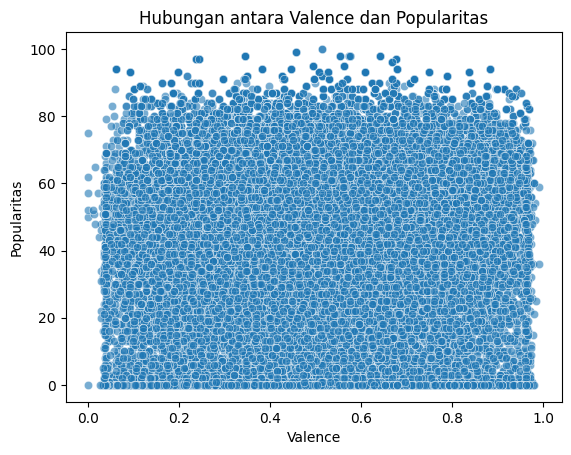

In [ ]:

sns.scatterplot(data=fd, x='valence', y='track_popularity', alpha=0.6)
plt.title("Hubungan antara Valence dan Popularitas")
plt.xlabel("Valence")
plt.ylabel("Popularitas")
plt.show()


Kode dibawah mendefinisikan fitur yang akan digunakan untuk memprediksi popularitas lagu menggunakan model Random Forest. Fitur yang dipilih adalah `danceability`, `energy`, `tempo`, `acousticness`, `valence`, dan `duration_ms`. Variabel target `y` adalah kolom `track_popularity`, yang berisi nilai popularitas lagu yang akan diprediksi oleh model. Selanjutnya, data ini dapat digunakan untuk melatih model Random Forest untuk memprediksi popularitas berdasarkan fitur-fitur yang telah disebutkan.

### Pendekatan model - _Random Forest_

In [ ]:
""" prediksi popularitas - pendekatan model Random Forest """
features = ['danceability', 'energy', 'tempo', 'acousticness', 'valence', 'duration_ms']
y = fd['track_popularity']

Kode ini membagi dataset menjadi dua bagian: data latih dan data uji, dengan menggunakan fungsi `train_test_split()` dari *scikit-learn*. Sebanyak 80% data digunakan untuk pelatihan model, sementara 20% sisanya digunakan untuk pengujian. Pembagian ini dilakukan berdasarkan fitur (`X`) dan target (`y`). Nilai `random_state=42` memastikan bahwa pembagian data tetap konsisten setiap kali kode dijalankan. Data latih digunakan untuk melatih model, sementara data uji digunakan untuk mengevaluasi kinerja model yang telah dilatih.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Kode dibawah ini melatih model *Random Forest Regressor* untuk memprediksi popularitas lagu. Model dibuat dengan 100 pohon keputusan (`n_estimators=100`) dan nilai acak yang konsisten setiap kali kode dijalankan dengan `random_state=42`. Fungsi `fit()` digunakan untuk melatih model menggunakan data latih (`X_train` dan `y_train`). Setelah pelatihan selesai, model siap digunakan untuk membuat prediksi berdasarkan data uji atau data baru.

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

dibawah ini untuk membangun model prediksi

In [ ]:
y_pred = rf_model.predict(X_test)

Kode dibawah ini digunakan untuk mengevaluasi kinerja model setelah melakukan prediksi. Fungsi `mean_squared_error()` digunakan untuk menghitung kesalahan kuadrat rata-rata (MSE), yang mengukur rata-rata selisih kuadrat antara nilai prediksi dan nilai asli. Sedangkan fungsi `r2_score()` menghitung koefisien determinasi (R²), yang menunjukkan seberapa baik model dapat menjelaskan variasi data. Hasil perhitungan MSE dan R² dicetak dengan dua angka desimal untuk memberikan gambaran tentang akurasi model dalam memprediksi popularitas lagu.

In [ ]:
"""prediksi model"""
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}, R2: {r2:.2f}")

MSE: 463.65, R2: 0.26


Kode dibawah ini melakukan clustering lagu berdasarkan fitur audio menggunakan algoritma *KMeans*. Pertama, model *KMeans* dengan 5 klaster (`n_clusters=5`) dilatih pada data fitur audio (`X`). Setiap lagu kemudian diberi label klaster yang sesuai dan ditambahkan ke dalam kolom baru `cluster` dalam dataset `fd`. Selanjutnya, visualisasi dilakukan dengan diagram sebar (scatter plot) untuk menampilkan hubungan antara dua fitur, yaitu `danceability` dan `energy`, dengan warna yang mewakili klaster masing-masing lagu. Grafik ini memberikan gambaran visual mengenai bagaimana lagu-lagu dikelompokkan berdasarkan karakteristik danceability dan energy.

<ipython-input-29-6002b9d246a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd['cluster'] = kmeans.labels_


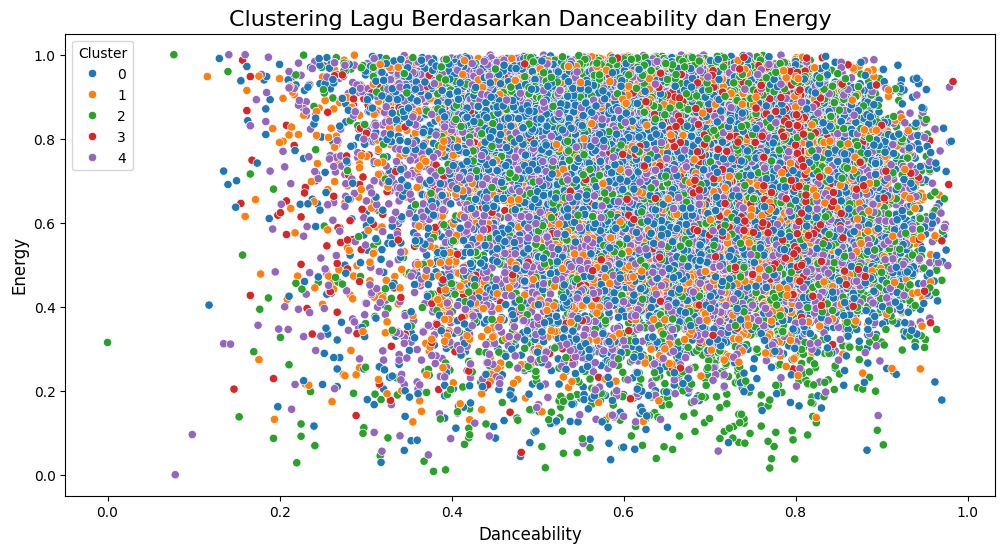

In [ ]:
"""clustering lagu berdasarkan fitur audio"""
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
fd['cluster'] = kmeans.labels_

plt.figure(figsize=(12, 6))
sns.scatterplot(x='danceability', y='energy', hue='cluster', data=fd, palette='tab10')
plt.title('Clustering Lagu Berdasarkan Danceability dan Energy', fontsize=16)
plt.xlabel('Danceability', fontsize=12)
plt.ylabel('Energy', fontsize=12)
plt.legend(title='Cluster')
plt.show()

Kode dibwaah ini menampilkan pentingnya setiap fitur dalam memprediksi popularitas lagu menggunakan model *Random Forest*. Setelah model dilatih, nilai pentingnya fitur diambil menggunakan atribut `feature_importances_` dari model. Nilai-nilai ini menunjukkan seberapa besar kontribusi masing-masing fitur terhadap prediksi yang dihasilkan oleh model. Fitur-fitur kemudian diurutkan berdasarkan tingkat kepentingannya dan divisualisasikan dalam grafik batang dengan warna biru muda. Grafik ini membantu untuk mengidentifikasi fitur-fitur mana yang paling berpengaruh dalam prediksi popularitas lagu.

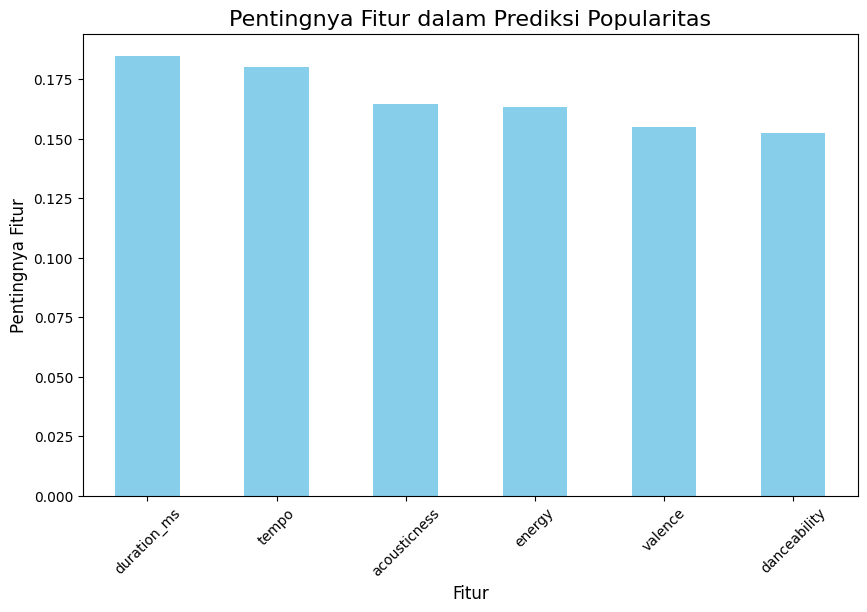

In [ ]:
feature_importances = pd.Series(rf_model.feature_importances_, index=features)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Pentingnya Fitur dalam Prediksi Popularitas', fontsize=16)
plt.xlabel('Fitur', fontsize=12)
plt.ylabel('Pentingnya Fitur', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Kode bawah menghitung dan memvisualisasikan profil rata-rata fitur untuk setiap klaster yang terbentuk dari model *KMeans*. Pertama, profil rata-rata fitur untuk setiap klaster dihitung dengan fungsi `groupby()` dan `mean()`. Setelah itu, data dinormalisasi agar nilai fitur untuk setiap klaster memiliki skala yang seragam, menggunakan fungsi `.div()` untuk membagi nilai setiap fitur dengan nilai maksimum dalam klaster tersebut. Hasilnya kemudian divisualisasikan dalam grafik batang terpisah untuk masing-masing fitur, di mana sumbu x menunjukkan fitur dan sumbu y menunjukkan nilai rata-rata yang telah dinormalisasi untuk setiap klaster. Grafik ini membantu untuk memahami karakteristik rata-rata dari masing-masing klaster berdasarkan fitur audio yang digunakan.

<Figure size 1200x600 with 0 Axes>

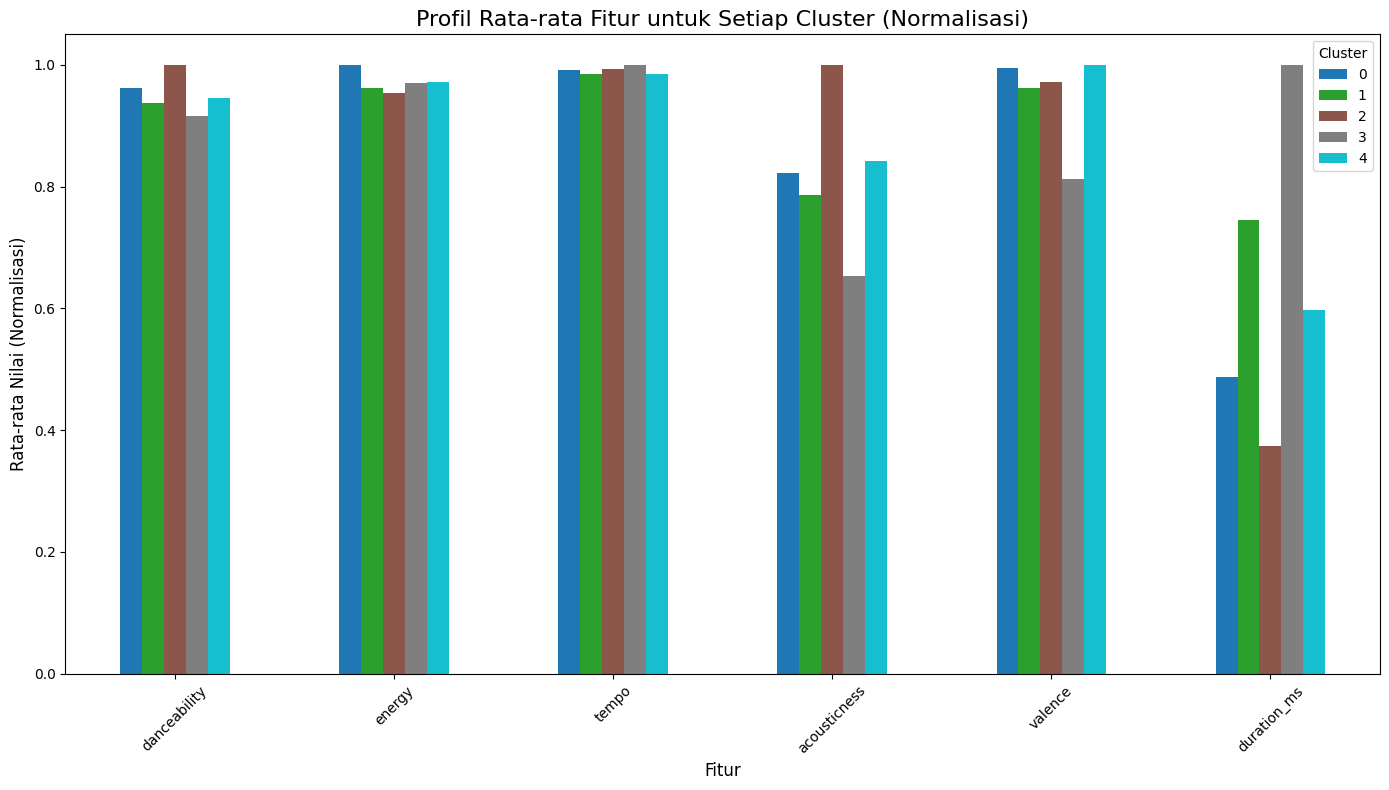

In [ ]:

cluster_profiles = fd.groupby('cluster')[features].mean()

normalized_profiles = cluster_profiles.div(cluster_profiles.max())

plt.figure(figsize=(12, 6))
normalized_profiles.T.plot(kind='bar', figsize=(14, 8), legend=True, colormap='tab10')
plt.title('Profil Rata-rata Fitur untuk Setiap Cluster (Normalisasi)', fontsize=16)
plt.xlabel('Fitur', fontsize=12)
plt.ylabel('Rata-rata Nilai (Normalisasi)', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

code dibawah ini untuk menghasilkan rata-rata fitur untuk setiap cluster

In [ ]:

print("Rata-rata nilai fitur untuk setiap cluster:")
print(cluster_profiles)

Rata-rata nilai fitur untuk setiap cluster:
         danceability    energy       tempo  acousticness   valence  \
cluster                                                               
0            0.657765  0.714355  121.124753      0.169678  0.511173   
1            0.640750  0.687165  120.439432      0.162178  0.494199   
2            0.684240  0.681190  121.340254      0.206204  0.499546   
3            0.626209  0.692704  122.213964      0.134533  0.417993   
4            0.647115  0.694308  120.446919      0.173605  0.514204   

           duration_ms  
cluster                 
0        202827.742599  
1        309666.472540  
2        155634.321145  
3        415599.569248  
4        248019.832947  


Kode dibawah menampilkan distribusi jumlah lagu dalam setiap klaster yang dihasilkan oleh model *KMeans*. Fungsi `value_counts()` digunakan untuk menghitung jumlah lagu dalam setiap klaster berdasarkan kolom `cluster`. Kemudian, distribusi ini divisualisasikan menggunakan grafik batang dengan warna oranye, di mana sumbu x menunjukkan klaster dan sumbu y menunjukkan jumlah lagu dalam masing-masing klaster. Grafik ini memberikan gambaran mengenai seberapa banyak lagu yang termasuk dalam setiap klaster, yang bisa digunakan untuk memahami keseimbangan dan pola dalam hasil clustering.

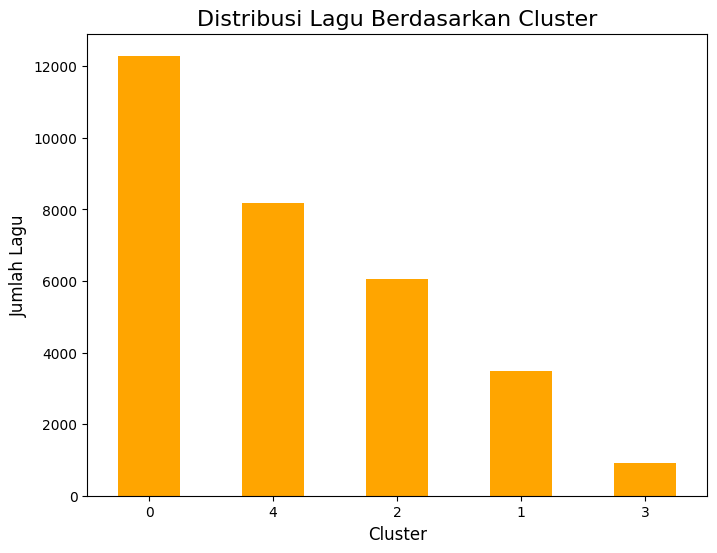

In [ ]:
cluster_counts = fd['cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='orange')
plt.title('Distribusi Lagu Berdasarkan Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Jumlah Lagu', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Kode dibawah ini membuat diagram sebar (scatter plot) untuk membandingkan hasil prediksi model dengan nilai asli dari data uji. Pada plot ini, sumbu x mewakili nilai asli (`y_test`) dan sumbu y mewakili nilai prediksi (`y_pred`). Titik-titik yang ada di plot ini menunjukkan seberapa dekat hasil prediksi dengan nilai yang sebenarnya. Transparansi titik diatur dengan `alpha=0.6` untuk mengurangi tumpang tindih. Grafik ini memungkinkan visualisasi sejauh mana model berhasil memprediksi popularitas lagu, di mana semakin dekat titik dengan garis diagonal, semakin baik model dalam memprediksi.

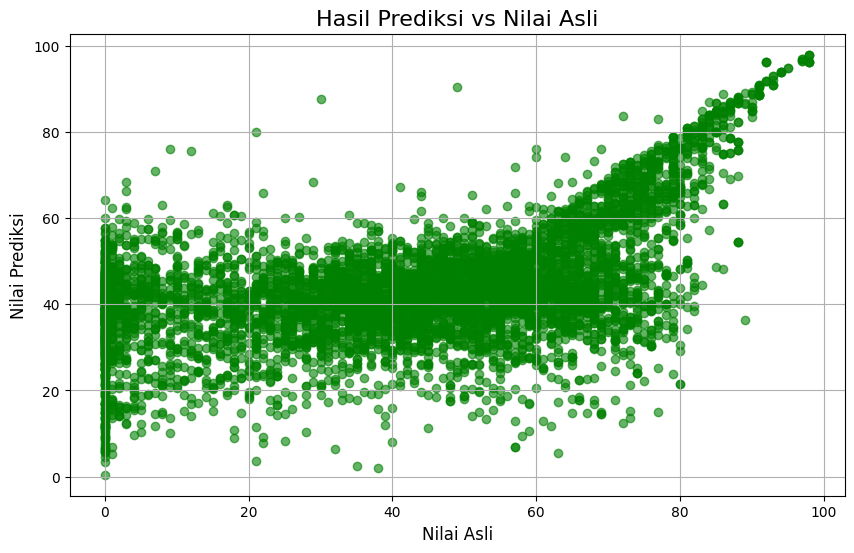

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.title('Hasil Prediksi vs Nilai Asli', fontsize=16)
plt.xlabel('Nilai Asli', fontsize=12)
plt.ylabel('Nilai Prediksi', fontsize=12)
plt.grid(True)
plt.show()